In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np  
import matplotlib.pyplot as plt 
import datetime
import pandas as pd
import os

In [49]:
# Définissez le chemin du dossier contenant les fichiers CSV
csv_folder = r'C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_fusion_journa_update'

# Obtenez la liste de tous les fichiers CSV dans le dossier
csv_files = [os.path.join(csv_folder, f) for f in os.listdir(csv_folder) if f.endswith('.csv')]

# Répertoire où les dossiers seront créés
parent_dir = r"C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\Type_Avion_Data"
data_cout_avion= pd.read_csv(r"C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_global\maint_global_history.csv")

# Obtenir la liste des avions uniques
unique_models = data_cout_avion["type_model"].unique()

# Parcourir la liste des avions uniques
for model in unique_models:
    # Créer un dossier pour l'avion actuel
    model_dir = os.path.join(parent_dir, model)
    os.makedirs(model_dir, exist_ok=True)


In [50]:
l_models = unique_models.tolist()

In [51]:
compteur = 1

for model in l_models:
    data_model_global = pd.DataFrame()

    for file in csv_files:
        if model in file:
            print(file, model)
            data = pd.read_csv(fr"{file}")
            data_model_global = pd.concat([data, data_model_global])
            compteur += 1
    data_model_global.to_csv(fr"C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\Type_Avion_Data\{model}\ML_{model}_global.csv")

C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_fusion_journa_update\ML_B767_0277.csv B767
C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_fusion_journa_update\ML_B767_0906.csv B767
C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_fusion_journa_update\ML_B767_2315.csv B767
C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_fusion_journa_update\ML_B767_2368.csv B767
C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_fusion_journa_update\ML_B767_2417.csv B767
C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_fusion_journa_update\ML_B767_2790.csv B767
C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_fusion_journa_update\ML_B767_2803.csv B767
C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_fusion_journa_update\ML_B767_3878.csv B767
C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier

In [52]:
data_ml = pd.read_csv(fr"C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\Type_Avion_Data\A320\ML_A320_global.csv")

In [53]:
data_ml.drop(columns=["Unnamed: 0.1","Unnamed: 0"], inplace=True)
data_ml

,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,categorie,aero,desc,cout_compo,...,type_model,debut_service,last_maint,en_maintenance,end_maint,temp,pressure,vibrations,vibrations_num,cout
0,D005274,A320_6924,REAA320-A320_6924-0,53.250115,2024-06-27,False,Composants Critiques,A320_6924,Réacteur gauche,15552.0,...,A320,2016-05-19,2024-02-03,False,Pas en maintenance,0.8,941.3,4.91676647956657 m/s²,4.916766,0.0
1,D007752,A320_6924,REAA320-A320_6924-1,44.586022,2024-06-27,False,Composants Critiques,A320_6924,Réacteur droit,17559.0,...,A320,2016-05-19,2024-02-03,False,Pas en maintenance,0.8,941.3,4.91676647956657 m/s²,4.916766,0.0
2,D000574,A320_6924,ORDA320-A320_6924-3,33.875327,2024-06-27,False,Composants Critiques,A320_6924,Ordinateur de vol,16047.0,...,A320,2016-05-19,2024-02-03,False,Pas en maintenance,0.8,941.3,4.91676647956657 m/s²,4.916766,0.0
3,D005569,A320_6924,AUTA320-A320_6924-4,63.686009,2024-06-27,False,Composants Critiques,A320_6924,Autopilote,19362.0,...,A320,2016-05-19,2024-02-03,False,Pas en maintenance,0.8,941.3,4.91676647956657 m/s²,4.916766,0.0
4,D002069,A320_6924,RADA320-A320_6924-6,29.194181,2024-06-27,False,Composants Critiques,A320_6924,Radar météorologique,17567.0,...,A320,2016-05-19,2024-02-03,False,Pas en maintenance,0.8,941.3,4.91676647956657 m/s²,4.916766,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,D005145,A320_1884,PORA320-A320_1884-39,28.500460,2024-06-04,False,Composants Secondaires,A320_1884,Porte cargo,2850.0,...,A320,2015-12-26,2024-06-01,False,Pas en maintenance,4.3,907.3,1.763677476664518 m/s²,1.763677,0.0
12204,D007225,A320_1884,SYSA320-A320_1884-40,23.216840,2024-06-04,False,Composants Secondaires,A320_1884,Systèmes d'oxygène d'urgence,4745.0,...,A320,2015-12-26,2024-06-01,False,Pas en maintenance,4.3,907.3,1.763677476664518 m/s²,1.763677,0.0
12205,D008637,A320_1884,PORA320-A320_1884-41,26.189260,2024-06-04,False,Composants Secondaires,A320_1884,Portes passagers,3053.0,...,A320,2015-12-26,2024-06-01,False,Pas en maintenance,4.3,907.3,1.763677476664518 m/s²,1.763677,0.0
12206,D000784,A320_1884,HUBA320-A320_1884-42,28.256040,2024-06-04,False,Composants Secondaires,A320_1884,Hublots,3593.0,...,A320,2015-12-26,2024-06-01,False,Pas en maintenance,4.3,907.3,1.763677476664518 m/s²,1.763677,0.0


In [54]:
data_ml.columns

Index(['ref_deg', 'linked_aero', 'compo_concerned', 'usure_nouvelle',
       'measure_day', 'need_replacement', 'categorie', 'aero', 'desc',
       'cout_compo', 'taux_usure_dep', 'ID_degrad_day', 'red_flag', 'jour_vol',
       'ref_vol', 'aero_linked', 'time_en_air', 'etat_voyant', 'type_model',
       'debut_service', 'last_maint', 'en_maintenance', 'end_maint', 'temp',
       'pressure', 'vibrations', 'vibrations_num', 'cout'],
      dtype='object')

In [55]:
data_avion_ml = data_ml[['usure_nouvelle',
       'categorie', 
       'taux_usure_dep',  'red_flag', 'time_en_air', 'etat_voyant', 
       'temp', 'pressure', 'vibrations_num']].copy()


In [56]:
data_avion_ml

,usure_nouvelle,categorie,taux_usure_dep,red_flag,time_en_air,etat_voyant,temp,pressure,vibrations_num
0,53.250115,Composants Critiques,45.971005,False,0.6,0.0,0.8,941.3,4.916766
1,44.586022,Composants Critiques,36.982714,False,0.6,0.0,0.8,941.3,4.916766
2,33.875327,Composants Critiques,28.049249,False,0.6,0.0,0.8,941.3,4.916766
3,63.686009,Composants Critiques,55.401383,False,0.6,0.0,0.8,941.3,4.916766
4,29.194181,Composants Critiques,22.541147,False,0.6,0.0,0.8,941.3,4.916766
...,...,...,...,...,...,...,...,...,...
12203,28.500460,Composants Secondaires,27.378654,False,9.8,0.0,4.3,907.3,1.763677
12204,23.216840,Composants Secondaires,21.939116,False,9.8,0.0,4.3,907.3,1.763677
12205,26.189260,Composants Secondaires,24.904774,False,9.8,0.0,4.3,907.3,1.763677
12206,28.256040,Composants Secondaires,21.496196,False,9.8,0.0,4.3,907.3,1.763677


In [57]:
dummies = pd.get_dummies(data_avion_ml[["categorie"]], dtype="int")
data_avion_ml_maj = pd.concat([data_avion_ml, dummies], axis=1)
data_avion_ml_maj.drop(columns="categorie",inplace=True)


In [58]:
target = data_avion_ml_maj["etat_voyant"].astype("int")
features = data_avion_ml_maj.drop(columns=["etat_voyant"])
features.head(1)

,usure_nouvelle,taux_usure_dep,red_flag,time_en_air,temp,pressure,vibrations_num,categorie_Composants Critiques,categorie_Composants Majeurs,categorie_Composants Secondaires
0,53.250115,45.971005,False,0.6,0.8,941.3,4.916766,1,0,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25,random_state=10)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

train_score = knn.score(X_train, y_train)
test_score  = knn.score(X_test, y_test)

print(train_score, "train accuracy")
print(test_score, "test accuracy")

0.999563128003495 train accuracy
0.9973787680209698 test accuracy


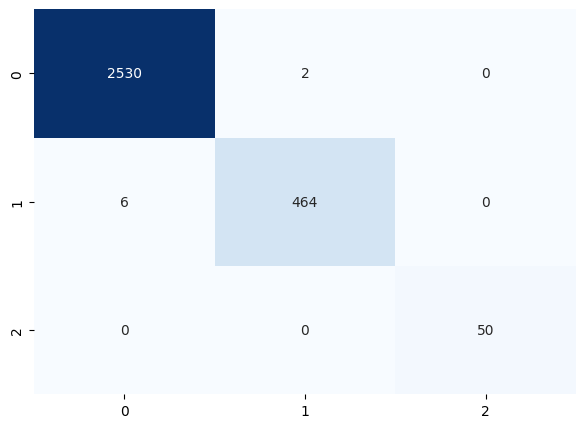

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
valeurs_reelles = y_test
predictions = pred_knn
matrice_confusion = confusion_matrix(valeurs_reelles, predictions)
plt.figure(figsize=(7, 5))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()